<a href="https://colab.research.google.com/github/RonaldoUlisses/Biblioteca_Pandas/blob/main/Case__estudo_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Contexto case
# uma loja de varejo deseja criar algumas metricas p/ acompanhar seus resultados,
# possuem a base de vendas e base de clientes
# missão é fazer todo o tratamento e união das bases p/ construção dessas metricas:
# Departamentos mais vendidos?
# Media de preço com frete por Nome do Departamento?
# Qtd de vendas por mês?
# Media de renda para cada tipo de canal de venda?
# Media de idade de clientes por bandeira?
# Premissas de negocio: Temos um erro no sistema, para compras em UF, considere o Estado do MS / Preço não pode ser maior que preço com frete


In [1]:
#1º importar as bibliotecas que serão utilizadas

import pandas as pd
import seaborn as sns

In [3]:
#importando base de dados

vendas = pd.read_excel("/content/varejo.xlsx")
vendas.head(10)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742
6,464255,Internet,A,2023-01-02,599.200,599.200,Eletrodomesticos,SP,5604
7,39780,Internet,B,2023-04-29,352.080,352.080,Acessorios e Inovacoes,BA,9098
8,75525,Mobile,B,2023-02-19,679.200,695.120,Moveis,SP,3442
9,82755,APP,B,2023-02-09,179.928,179.928,Beleza e Saude,SP,7026


In [4]:
#  verificando se ha dados nulos

vendas.info(10);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [5]:
# Para filtrar  dados nulos utiliza se a função isnull : varialvel[localização da key].isnull()]

vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones e Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar e Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar e Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones e Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones e Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs e Acessorios,NaN,17784


In [6]:
vendas[vendas["Preço"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones e Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar e Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar e Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones e Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones e Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs e Acessorios,NaN,17784


In [7]:
# Comando para apagar linha nulas é utilizado .dropna: variavel.dropna()/porem este comando apaga a linha inteira/ exemplo abaixo:
# vendas_sem_nulos = vendas.dropna()
# vendas_sem_nulos.info()

In [8]:
# Para preencher os valores nulos utilizasse a função .fillna: variavel["key"].fillna("valor que substituirá")

vendas["estado"] =  vendas["estado"].fillna("Ms")
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [9]:
# Para subsituir o valor nulo em preço vamos subsituir com a media do preço total, sendo assim acheremos a media
#usando  a função .mean : variavel["key"].mean()/

#criando variavel de media:
media_preco = vendas["Preço"].mean()

# Agora substituindo o valor nulo em preços pelo valor medio dos preços totais
vendas["Preço"] = vendas["Preço"].fillna(media_preco)

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [10]:
#agrupando por canais de vendas utilizando comando nunique/ comando nunique é utilizado p/ contar o número de valores únicos em uma série ou em um DataFrame
# Foi utilizado comando .replace para alterar nome da Key : varivael["key"].tipo de dado.replace("valor a ser subistiuido", "novo nome"). veja abaixo:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()


idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [11]:
# Para agrupar grupos de acordo com cada bandeira utiliza se o comando .groupby: variavel.groupby("condição")
# para realizar a contagem unica dentro do agrupamento utiliza se o complemento de função .nunique : key.nunique ()
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [12]:
# Qtd de vendas por departamento

vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [13]:
# Qtd de vendas por estado
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
Ms      302
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [14]:

#vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [15]:
# A função describe é utilizada para mostras descrição mais detalhada dos dados : variavel[["keys analisadas"]].describe
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [16]:
vendas_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço < Preço_com_frete")

In [17]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [18]:
# O comando .describe() em pandas é utilizado para gerar estatísticas descritivas de um DataFrame ou de uma série de dados.
# Ele fornece um resumo estatístico que inclui contagem, média, desvio padrão, valores mínimos, quartis e valores máximos para cada coluna
# numérica no DataFrame.

vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [19]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [20]:
# comando .query é utilizado para filtrar dados trazendo calculo de soma, media, desvio padrão
# media , min e max

vendas_correto.query("Nome_Departamento =='Esporte e Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [21]:
# Departamentos mais vendidos?

# Agrupando por departamentos com mais comprar realizadas de forma decrescente e anexando indice.
# utilizando função .groupby para agrupar e a função .sort_values (criterio) para colocar em valores descrecentes mais
# a função .reset_index() para anexar indices nas linhas.

vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades Domesticas,1366
5,Acessorios e Inovacoes,1243
6,Beleza e Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos de Limpeza,522


In [22]:
# Media de preço com frete por Nome do Departamento?

# Funções utilizadas para agrupar a media de preços  om frete por departamento
#função .agg("mean")
#A função .agg em Python, especialmente em pandas, é utilizada para aplicar uma ou mais operações agregadoras a um DataFrame ou a uma Série de dados.
# Essas operações agregadoras podem ser funções predefinidas (como média, soma, mínimo, máximo) ou funções personalizadas
# definidas pelo usuário
#função round() -- A função round em Python é utilizada para arredondar um número para uma quantidade específica de casas decimais.

round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,3469.38
1,Informatica,2159.78
2,Linha Industrial,2027.11
3,Cine e Foto,1851.20
4,Telefones e Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte e Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos Musicais,834.61


In [23]:
# Qtd de vendas por mês?
# Agrupando quantidade de vendas por data

vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending = False).reset_index()


,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [24]:
#agrupando por mês
#criando uma coluna nova chamada mês
# usando a função .dt.month para extrair o mes da data:
# A função .dt.month em Python, especialmente em pandas, é utilizada para extrair o mês de objetos do tipo data ou hora em um DataFrame.

vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-24-bd60d3397dcb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [25]:
# agrupando pelo mes

vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending = False).reset_index()

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [26]:
# realizando Join entre tabelas
#importando base de dados de clientes

cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()


,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [27]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [28]:
cliente[["idade","renda"]].describe().reset_index()

,index,idade,renda
0,count,26425.000000,26425.000000
1,mean,53.412564,8241.470350
2,std,20.698825,3899.871482
3,min,18.000000,1500.000000
4,25%,35.000000,4859.000000
5,50%,53.000000,8234.000000
6,75%,71.000000,11629.000000
7,max,89.000000,15000.000000


In [29]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [30]:
# Mudando tipo de dado em "renda" utilizando comando .astype({"key":type})
cliente = cliente.astype({"renda": float})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [31]:
# realizando merge duas tabelas de dados com a função de .merge: variavel_1(varaivel_2, how = "left"), on = ""key em comum nas duas tabelas""

vendas_cliente = vendas_correto.merge(cliente, how= "left", on = "cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [32]:
# Agrpando a media de renda por canais de venda: função groupby + .agg + sort_values()+ .reset_index()
# criando a variavel - agg_idcanal_renda

agg_idcanal_renda =  round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending = False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [33]:
# Agrupando media de idade dos clientes por bandeira. Funções : .groupby ; agg; sort_ values
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending = False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [34]:
# Aplicando graficos
# importando biblioteca usada para construit graficos:
#biblioteca matplotlib

import matplotlib.pyplot as plt

Text(0.5, 1.0, 'idade media por bandeira')

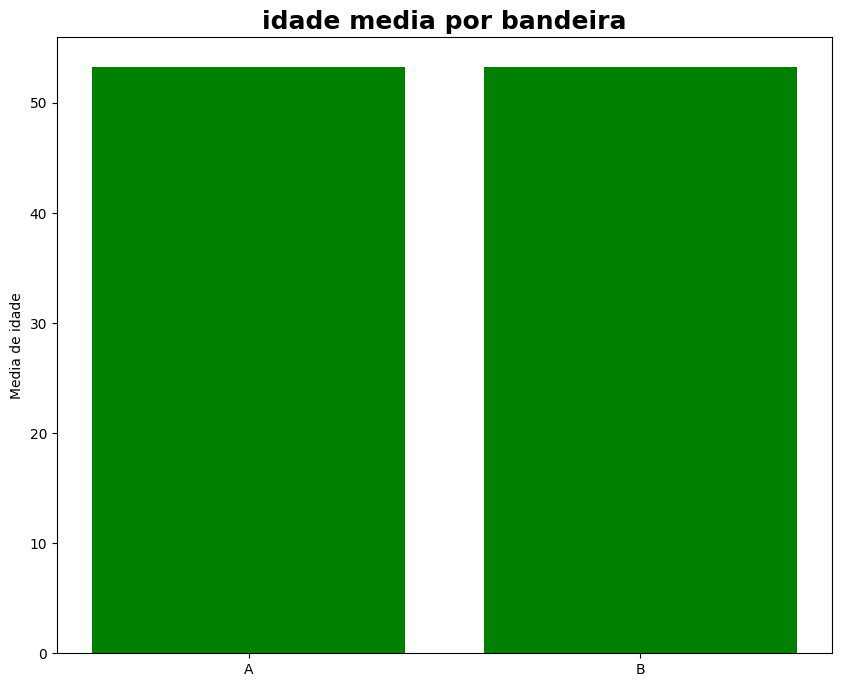

In [35]:
fig = plt.figure(figsize = (10,8))

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color ="green")

plt.ylabel("Media de idade")

plt.title("idade media por bandeira", loc = "center", fontsize = 18, fontweight = "bold", color= "black")

Text(0.5, 1.0, 'Renda media por canal de venda')

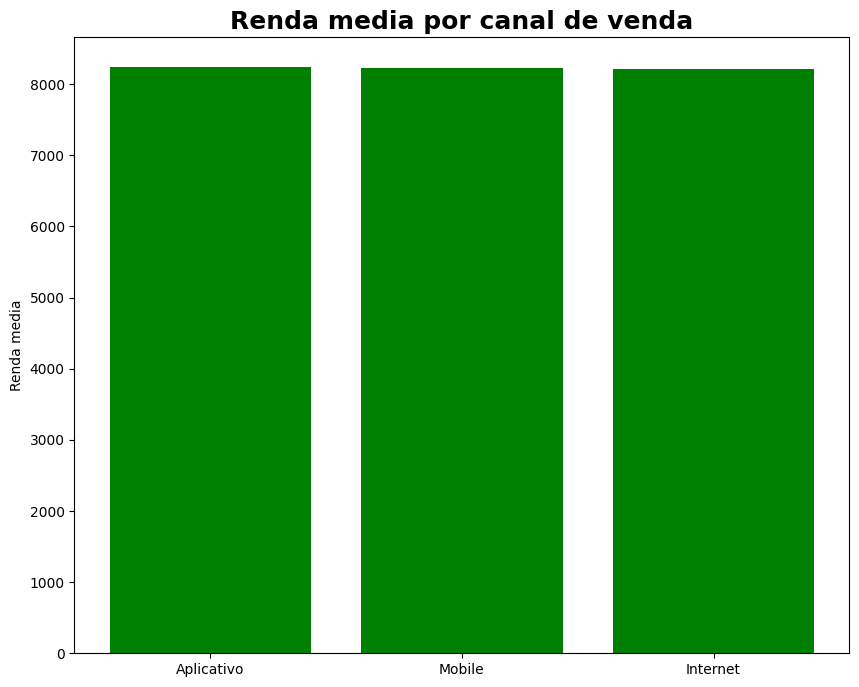

In [36]:
fig = plt.figure(figsize =(10,8))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color ="green")

plt.ylabel("Renda media")
plt.title("Renda media por canal de venda", loc= "center", fontsize = 18, fontweight = "bold", color ="black")

In [37]:
# Criando grafico de venda por data
#1º criando variavel : vendas por data
vendas_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
vendas_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


<function matplotlib.pyplot.show(close=None, block=None)>

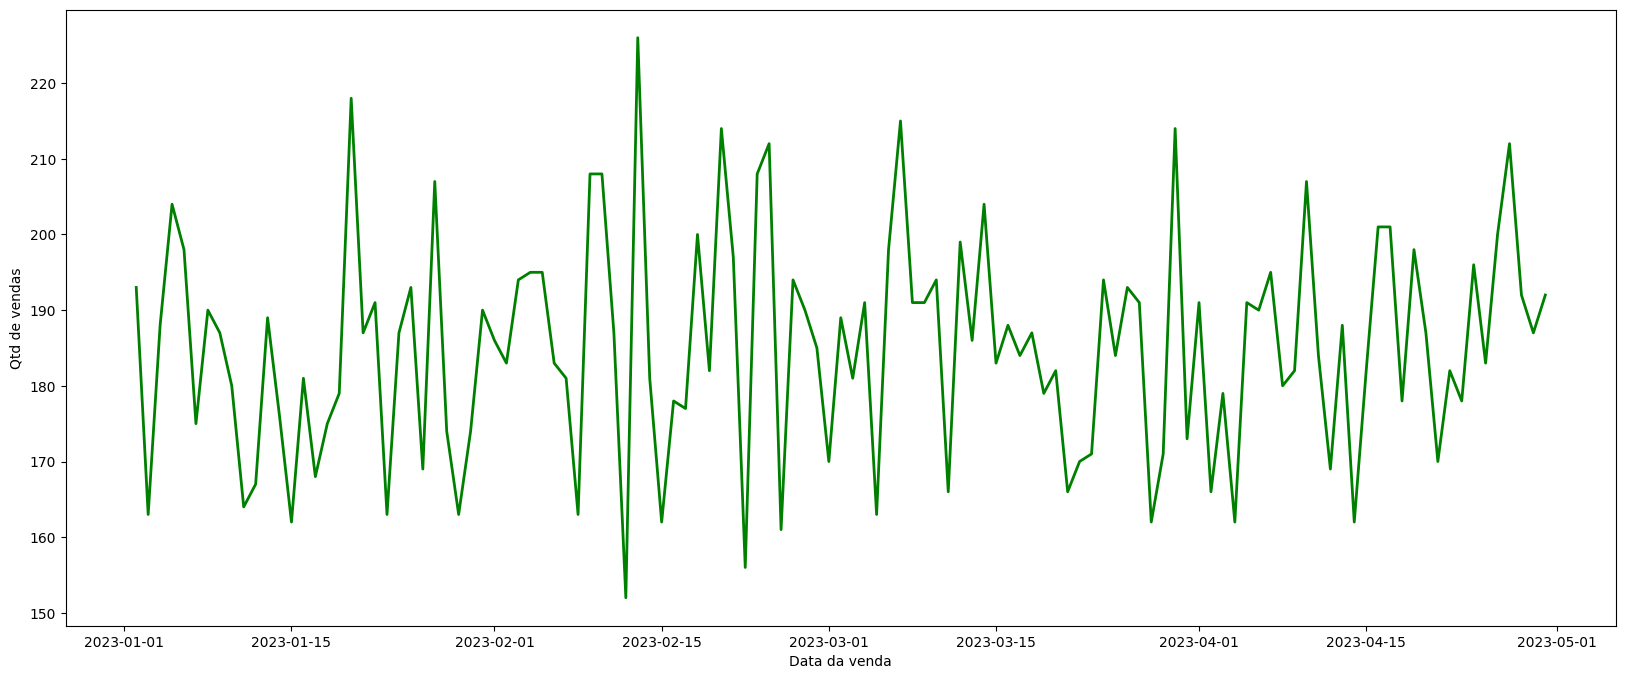

In [38]:
fig =plt.figure(figsize = (20,8));

plt.xlabel("Data da venda")
plt.ylabel("Qtd de vendas")
x = vendas_por_data ["Data"]
y =vendas_por_data ["idcompra"]

plt.plot(x,y, color = "green", linewidth = "2")
plt.show

In [39]:
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,3469.38
1,Informatica,2159.78
2,Linha Industrial,2027.11
3,Cine e Foto,1851.20
4,Telefones e Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte e Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos Musicais,834.61


Text(0.5, 1.0, 'Renda media por Departamento')

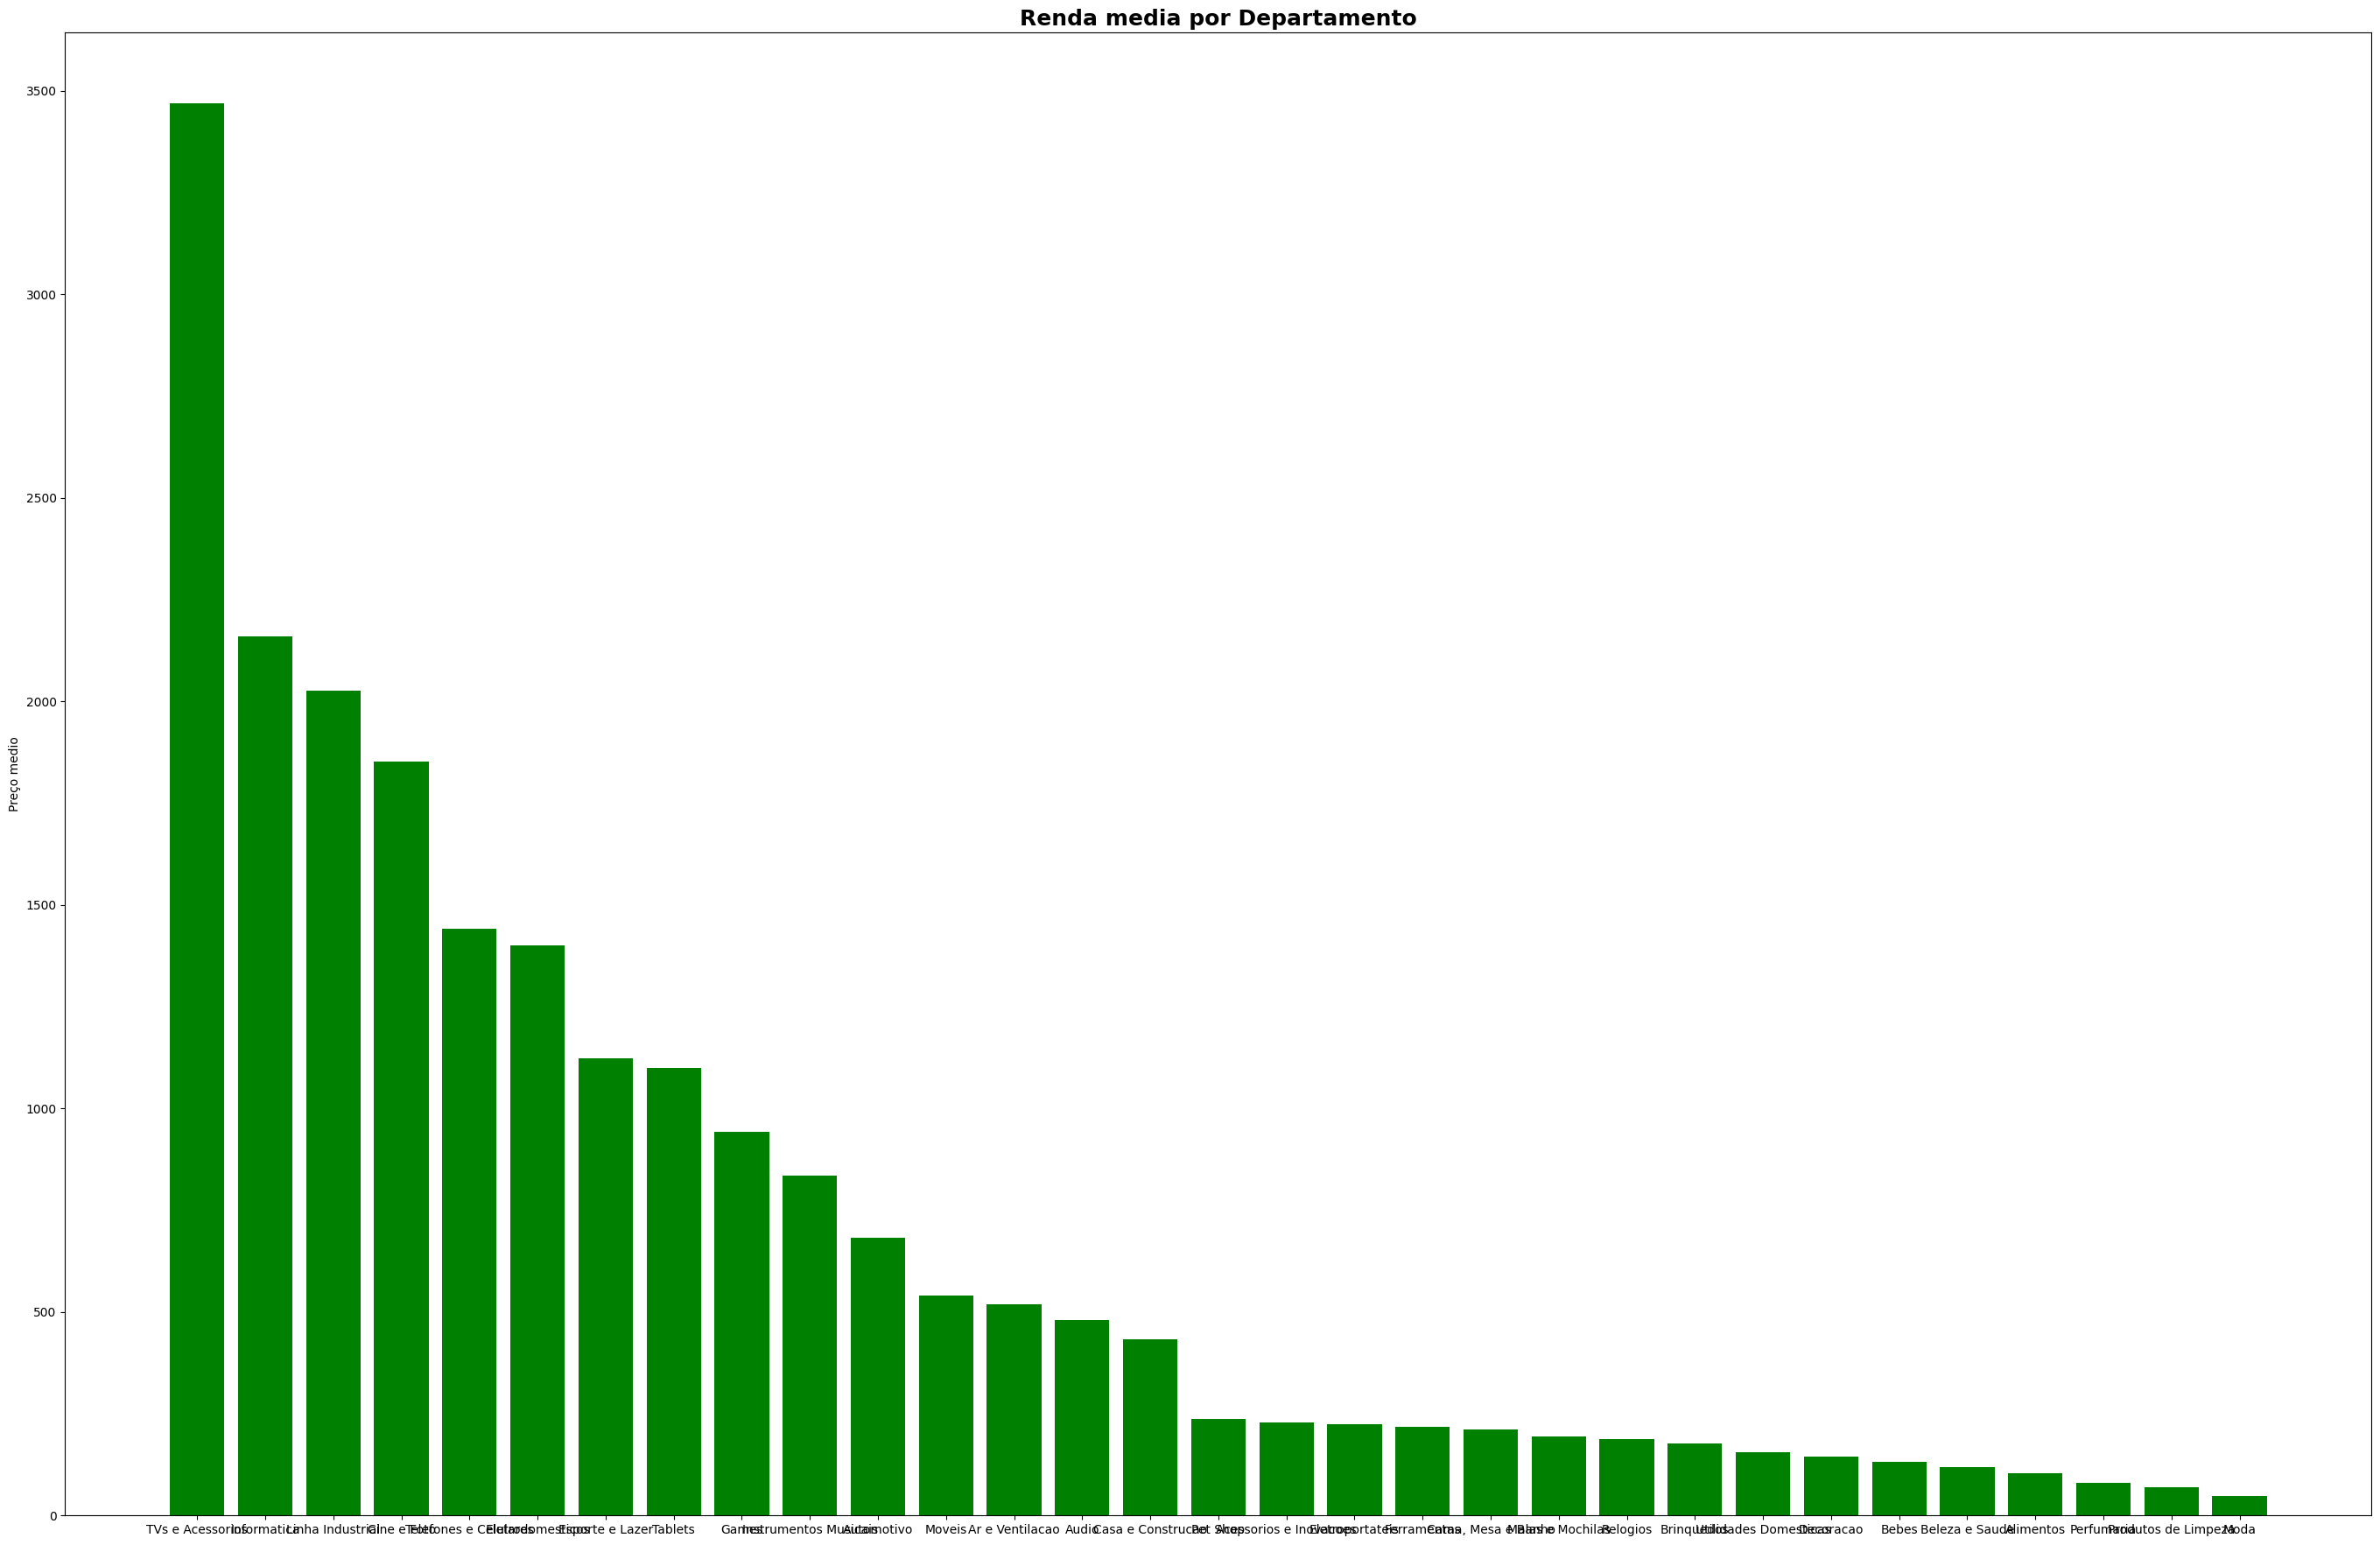

In [40]:
fig = plt.figure(figsize =(34,22))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color ="green")

plt.ylabel("Preço medio")
plt.title("Renda media por Departamento", loc= "center", fontsize = 18, fontweight = "bold", color ="black")


In [41]:
# Fazendo graficos com outra biblioteca somente para estudo
# instalando a ferramenta plotly

%pip install plotly
%pip install cufflinks
%pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00


In [42]:
#importando a biblioteca plotly

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objs as go
import plotly.express as px

In [43]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [44]:
px.line(vendas_por_data, x = "Data", y = "idcompra")

In [45]:
px.bar(agg_dept_preco , x = "Nome_Departamento", y = "Preço_com_frete")